In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the Amazon sales dataset
ad = pd.read_csv('/content/final.csv')

ParserError: ignored

In [ ]:
# Explore the dataset
ad.head()

In [ ]:
# Question 1: What are the dimensions of the dataset?
print('Dimension of the dataset')
dimension = ad.shape
dimension

In [ ]:
# Question 2: What are the column names?
print('Column names')
columns = ad.columns
columns

In [ ]:
# Question 3: Are there any missing values in the dataset?
print('Missing Values')
missing_values = ad.isnull().sum()
missing_values

Missing Values


product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [ ]:
# Question 4: What are the data types of the columns?
print('Data types of the Dataset')
data_types = ad.dtypes
data_types

Data types of the Dataset


product_id              object
product_name            object
category                object
discounted_price        object
actual_price            object
discount_percentage    float64
rating                 float64
rating_count            object
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object

In [ ]:
# Question 5: What are the summary statistics of the dataset?
print('Summary statistics of the dataset')
ad.describe()


Summary statistics of the dataset


,discount_percentage,rating
count,1465.000000,1465.000000
mean,47.691468,4.096587
std,21.635905,0.291574
min,0.000000,2.000000
25%,32.000000,4.000000
50%,50.000000,4.100000
75%,63.000000,4.300000
max,94.000000,5.000000


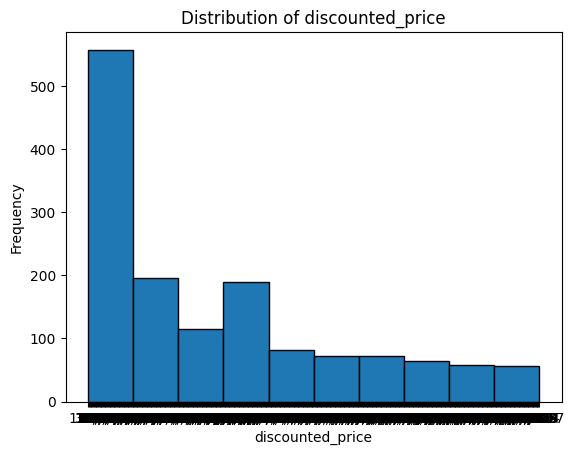

In [ ]:
# Question 6: What is the distribution of sales (discounted price vs. actual price)?
plt.hist(ad['discounted_price'], bins=10, edgecolor='black')
plt.xlabel('discounted_price')
plt.ylabel('Frequency')
plt.title('Distribution of discounted_price')
plt.show()

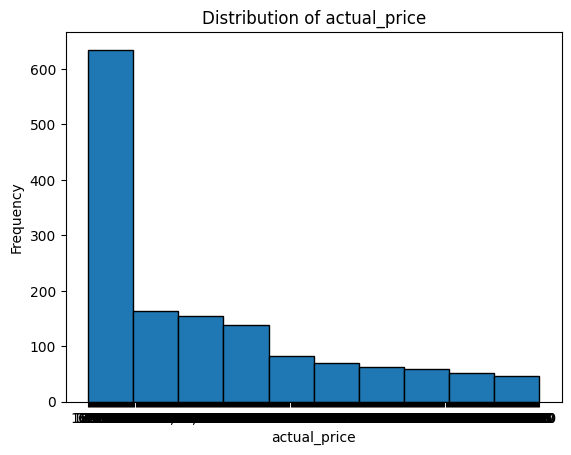

In [ ]:
# Question 6: What is the distribution of sales (discounted price vs. actual price)?
plt.hist(ad['actual_price'], bins=10, edgecolor='black')
plt.xlabel('actual_price')
plt.ylabel('Frequency')
plt.title('Distribution of actual_price')
plt.show()

In [ ]:
# Question 7: What are the top-selling products?
ad.groupby('category')['product_name'].count().nlargest(5)

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables    233
Electronics|WearableTechnology|SmartWatches                                           76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                  68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                         63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                          52
Name: product_name, dtype: int64

In [ ]:
ad.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [ ]:
# Question 9: What is the average rating and rating count for products?
ad.groupby('rating_count')['rating'].mean().head(10)

rating_count
1,001    4.0
1,004    3.9
1,015    3.9
1,017    4.2
1,021    4.1
1,026    4.0
1,029    4.5
1,030    4.4
1,034    4.1
1,035    4.3
Name: rating, dtype: float64

<Axes: xlabel='category', ylabel='count'>

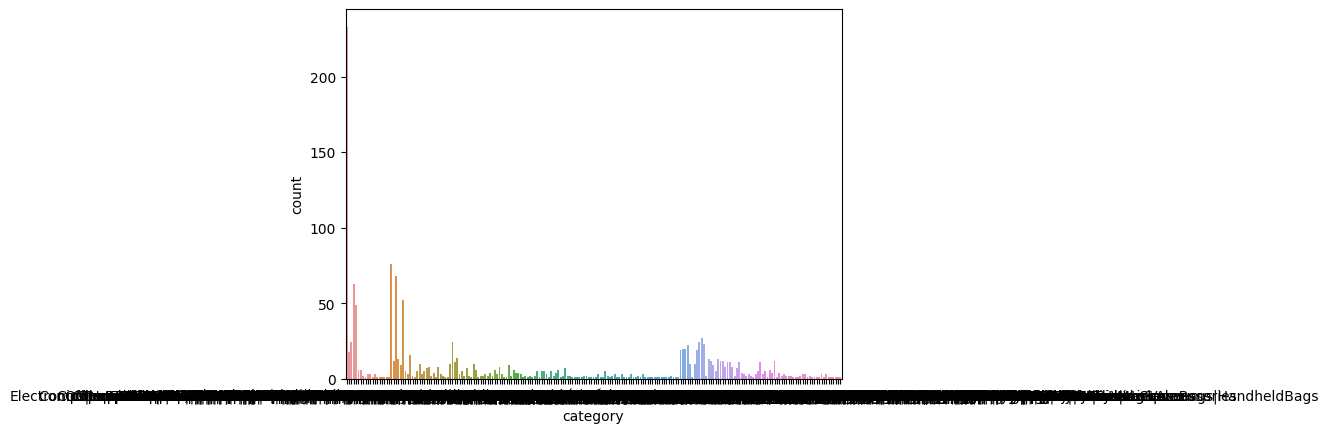

In [ ]:
# Question 10: What is the distribution of products across different categories?
sns.countplot(x = 'category',data = ad)

<ipython-input-119-d70ee821107c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = ad[['rating', 'rating_count', 'discounted_price']].corr()


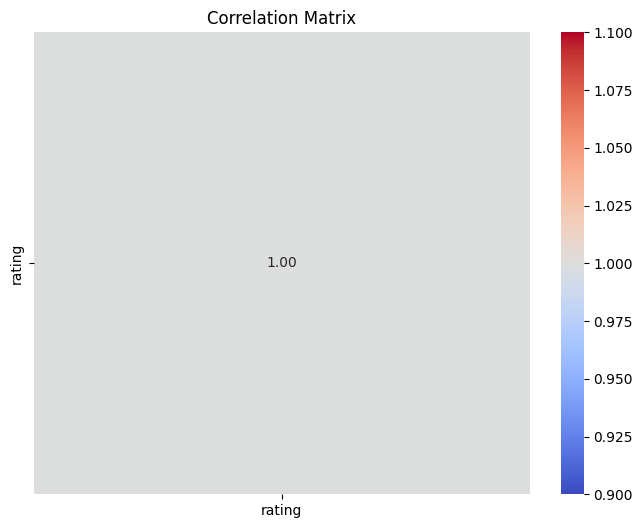

In [ ]:
# Question 10: What is the correlation between ratings, rating count, and discounted price?
correlation_matrix = ad[['rating', 'rating_count', 'discounted_price']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
sd = pd.read_csv('/content/amazon.csv')

In [ ]:
sd['discount_percentage'] = sd['discount_percentage'].str[:-1].astype(float)

In [ ]:
# Question 11: What is the average discount percentage across all products?
ad['discount_percentage'].mean()

47.69146757679181

In [ ]:
# Question 12: What are the top-rated products with a high number of ratings?
top_rated_products = ad[ad['rating'] >= 4.5].nlargest(5, 'rating_count')[['product_name', 'rating', 'rating_count']]
print("Top-rated products with a high number of ratings:")
print(top_rated_products)

Top-rated products with a high number of ratings:
                                          product_name  rating  rating_count
864  SanDisk Extreme SD UHS I 64GB Card for 4K Vide...     4.5      205052.0
40   AmazonBasics USB 2.0 Cable - A-Male to B-Male ...     4.5      107687.0
852  AmazonBasics USB 2.0 Cable - A-Male to B-Male ...     4.5      107686.0
810  Crucial BX500 240GB 3D NAND SATA 6.35 cm (2.5-...     4.5       92925.0
212  AmazonBasics USB 2.0 Extension Cable for Perso...     4.5       74977.0


In [ ]:
ad['rating_count'] = ad['rating_count'].str.replace(',','').astype(float)

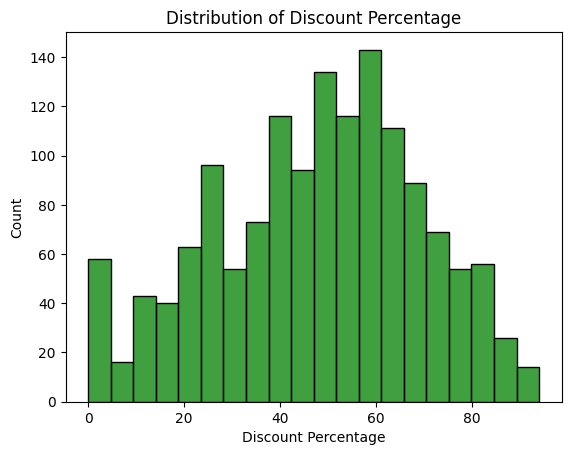

In [ ]:
# Question 13: What is the distribution of products by discount percentage?

sns.histplot(sd['discount_percentage'], bins=20, color='green')
plt.title('Distribution of Discount Percentage')
plt.xlabel('Discount Percentage')
plt.ylabel('Count')
plt.show()

In [ ]:
# Question 14: What is the average discount percentage by category?
avg_discount_by_category = ad.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
print("Average Discount Percentage by Category:")
print(avg_discount_by_category)

Average Discount Percentage by Category:
category
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                                 90.0
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                          90.0
Electronics|Headphones,Earbuds&Accessories|Earpads                                                                  90.0
Electronics|Headphones,Earbuds&Accessories|Adapters                                                                 88.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers       87.5
                                                                                                                    ... 
OfficeProducts|OfficeElectronics|Calculators|Basic                                                                   0.0
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|SmallApplianceParts&Accessories|StandMixerAc

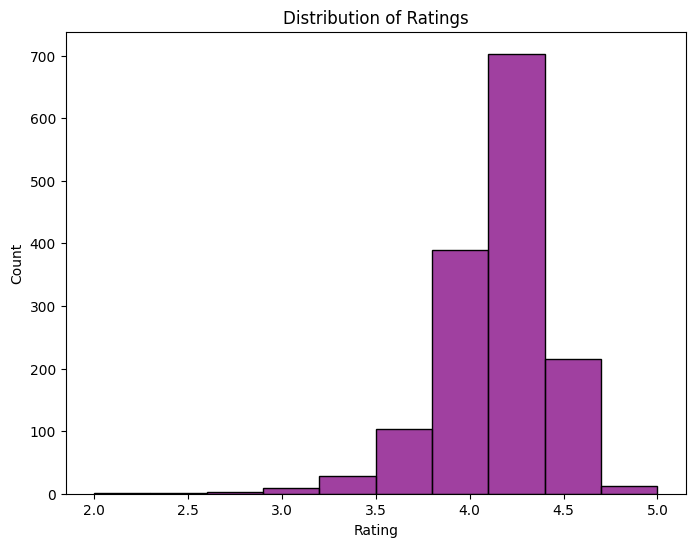

In [ ]:
# Question 15: What is the distribution of ratings for products?
plt.figure(figsize=(8, 6))
sns.histplot(ad['rating'], bins=10, color='purple')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
# Question 16: What is the average rating by category?
avg_rating_by_category = ad.groupby('category')['rating'].mean().sort_values(ascending=False)
print("Average Rating by Category:")
print(avg_rating_by_category)

Average Rating by Category:
category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                                                               4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|Acces

In [ ]:
# Question 17: What are the most common rating counts for products?
rating_count_distribution = ad['rating_count'].value_counts().nlargest(5)
print("Most common rating counts for products:")
print(rating_count_distribution)

Most common rating counts for products:
9378.0     9
18998.0    8
24269.0    7
43994.0    6
32840.0    5
Name: rating_count, dtype: int64


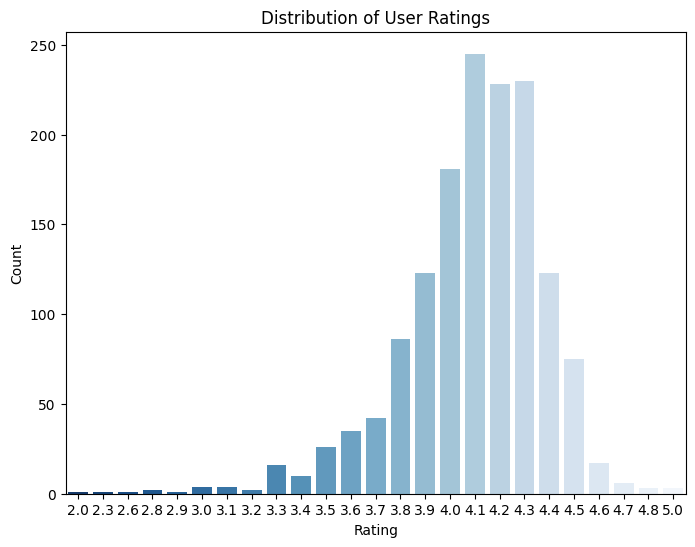

In [ ]:
# Question 18: What is the distribution of user ratings?
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=ad, palette='Blues_r')
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
# Question 19: What are the top-rated products with the highest discounts?
top_rated_discounted_products = ad[ad['rating'] >= 4.5].nlargest(5, 'discount_percentage')[['product_name', 'rating', 'discount_percentage']]
print("Top-rated products with the highest discounts:")
print(top_rated_discounted_products)

Top-rated products with the highest discounts:
                                           product_name  rating  \
476   ELV Aluminum Adjustable Mobile Phone Foldable ...     4.5   
88    Lapster 65W compatible for OnePlus Dash Warp C...     4.5   
114   Cotbolt Silicone Protective Case Cover for LG ...     4.5   
174   Syncwire LTG to USB Cable for Fast Charging Co...     5.0   
1018  Lapster 65W compatible for OnePlus Dash Warp C...     4.5   

      discount_percentage  
476                  82.0  
88                   80.0  
114                  80.0  
174                  80.0  
1018                 80.0  


In [ ]:
ad.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [ ]:
# Question 20: What is the average discounted price by category?
avg_discounted_price_by_category = sd.groupby('category')['discounted_price'].mean().sort_values(ascending=False)
print("Average Discounted Price by Category:")
print(avg_discounted_price_by_category)

Average Discounted Price by Category:
category
Home&Kitchen|Heating,Cooling&AirQuality|AirConditioners|Split-SystemAirConditioners                              42990.000000
Computers&Accessories|Laptops|TraditionalLaptops                                                                 37247.000000
Computers&Accessories|Tablets                                                                                    26999.000000
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                                    24840.190476
Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Vacuums&FloorCare|Vacuums|RoboticVacuums             23449.500000
                                                                                                                     ...     
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                          99.000000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&Writin

In [ ]:
sd['discounted_price'] = sd['discounted_price'].str.replace(',','').astype(float)